## MNIST Handwritten Digit Classification Dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

The example below loads the MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

In [1]:
from keras.datasets import mnist

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [3]:
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainy.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testy.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
import matplotlib.pyplot as plt
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    
plt.show()

<Figure size 640x480 with 9 Axes>

### What does the data actually look like?

Let's print out the very first image, as it stored in the trainX[0] variable, and then let's also print out the trainy[0] variable as well.  Note that it is usual to use upper case X for the features array, and lower case y for the value array.  This is because X may contain many features, whereas y is typically a single number.

We see that trainX contains 28 x 28 arrays of integers ... these integers are in the range 0-255, corresponding to the greyscale from black (0) to white (255).

The first element is the number '5', and we can see that trainy[0] = 5, as expected.

In [5]:
print (trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print (trainy[0])

5


## Model Evaluation Methodology

Although the MNIST dataset is effectively solved, it can be a useful starting point for developing and practicing a methodology for solving image classification tasks using convolutional neural networks.

The dataset already has a well-defined train and test dataset that we can use.

In order to estimate the performance of a model for a given training run, we can further split the training set into a train and validation dataset. As we saw above, we have 60000 images for training, and then an additional 10000 images for testing.  The idea here is to take the 60000 training imager, and split them up into some amount for pure training, and then some for validation.  Performance on the train and validation dataset over each run can then be plotted to provide learning curves and insight into how well a model is learning the problem.

The Keras API supports this by specifying the “validation_data” argument to the model.fit() function when training the model, that will, in turn, return an object that describes model performance for the chosen loss and metrics on each training epoch.

## Reshape Dataset

We know some things about the dataset.

For example, we know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale.

Therefore, we can load the images and reshape the data arrays to have a single color channel.

We also know that there are 10 classes and that classes are represented as unique integers.

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function.

In [7]:
from keras.utils import to_categorical
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainy = to_categorical(trainy)
testy = to_categorical(testy)

print (trainy[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Define a load_dataset() function

Let's put all of this together into a single function that loads and reshapes the dataset

In [8]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

## Convert data

Next, let's convert the pixel data from integers to floats, and also let's rescale all the numbers to a value between 0 and 1.  We will write function to do this, so that we can use it for various datasets.

In [9]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## Define Model

Next, we need to define a baseline convolutional neural network model for the problem.

The model has two main aspects: the feature extraction front end comprised of convolutional and pooling layers, and the classifier backend that will make a prediction.

For the convolutional front-end, we can start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification task, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.

The define_model() function below will define and return this model.

In [10]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

## Evaluate Model

After the model is defined, we need to evaluate it.

The model will be evaluated using five-fold cross-validation. The value of k=5 was chosen to provide a baseline for both repeated evaluation and to not be so large as to require a long running time. Each test set will be 20% of the training dataset, or about 12,000 examples, close to the size of the actual test set for this problem.

The training dataset is shuffled prior to being split, and the sample shuffling is performed each time, so that any model we evaluate will have the same train and test datasets in each fold, providing an apples-to-apples comparison between models.

We will train the baseline model for a modest 10 training epochs with a default batch size of 32 examples. The test set for each fold will be used to evaluate the model both during each epoch of the training run, so that we can later create learning curves, and at the end of the run, so that we can estimate the performance of the model. As such, we will keep track of the resulting history from each run, as well as the classification accuracy of the fold.

The evaluate_model() function below implements these behaviors, taking the training dataset as arguments and returning a list of accuracy scores and training histories that can be later summarized.

In [11]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

## Present Results

Once the model has been evaluated, we can present the results.

There are two key aspects to present: the diagnostics of the learning behavior of the model during training and the estimation of the model performance. These can be implemented using separate functions.

First, the diagnostics involve creating a line plot showing model performance on the train and test set during each fold of the k-fold cross-validation. These plots are valuable for getting an idea of whether a model is overfitting, underfitting, or has a good fit for the dataset.

We will create a single figure with two subplots, one for loss and one for accuracy. Blue lines will indicate model performance on the training dataset and orange lines will indicate performance on the hold out test dataset. The summarize_diagnostics() function below creates and shows this plot given the collected training histories.

In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(histories,scores):
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    for i in range(len(histories)):
        # plot loss
        ax1.title.set_text('Cross Entropy Loss')
        ax1.plot(histories[i].history['loss'], color='blue',label='test '+str(i+1))
        ax1.plot(histories[i].history['val_loss'], color='orange',label='train '+str(i+1))
        ax1.set_ylabel('Loss')
        ax1.set_xlabel('Epoch')
        ax1.legend()
        # plot accuracy
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(histories[i].history['accuracy'], color='blue',label='test '+str(i+1))
        ax2.plot(histories[i].history['val_accuracy'], color='orange',label='train '+str(i+1))
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.legend() 
        # box and whisker plots of results
        ax3.title.set_text('Final Result Summary')
        ax3.boxplot(scores)
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.show()

## Complete Example

We need a function that will drive the test harness.

This involves calling all of the define functions.

In [13]:
def run_test_harness():
	# load dataset
    trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
    scores, histories = evaluate_model(trainX, trainY)
	# learning curves
    summarize_diagnostics(histories,scores)
    return scores, histories

> 98.558
> 98.533
> 98.333
> 98.650
> 98.500
Accuracy: mean=98.515 std=0.104, n=5


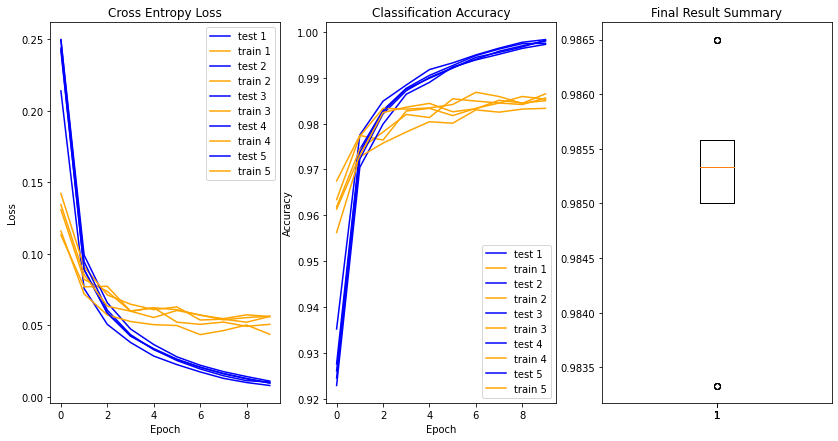

In [14]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

scores,histories = run_test_harness()

Accuracy: mean=98.515 std=0.104, n=5


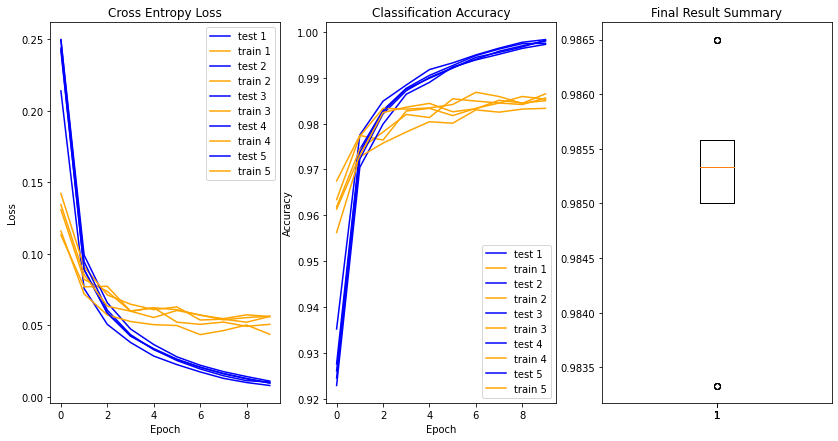

In [15]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
for i in range(len(histories)):
    # plot loss
    ax1.title.set_text('Cross Entropy Loss')
    ax1.plot(histories[i].history['loss'], color='blue',label='test '+str(i+1))
    ax1.plot(histories[i].history['val_loss'], color='orange',label='train '+str(i+1))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    # plot accuracy
    ax2.title.set_text('Classification Accuracy')
    ax2.plot(histories[i].history['accuracy'], color='blue',label='test '+str(i+1))
    ax2.plot(histories[i].history['val_accuracy'], color='orange',label='train '+str(i+1))
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend() 
    # box and whisker plots of results
    ax3.title.set_text('Final Result Summary')
    ax3.boxplot(scores)
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
plt.show()